In [3]:
#Importing all the useful libraties
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [6]:
# Specifying the path to csv file
file_path = r'C:\Users\alish\Dropbox\PC\Desktop\SEM-6\EE-769\wine+quality\winequality-white.csv'

# Read the dataset from the csv file into a DataFrame separated by ";"
df = pd.read_csv(file_path,sep=";")

# Display the first few rows of the DataFrame
print(df.head())

# Initialize a list to store lists of features
features_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                 'pH', 'sulphates', 'alcohol']

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Extract features from the row
    features = row.tolist()

    # Convert each feature to a list of values
    features = [float(value) for value in features]  # Convert to appropriate data type if needed

    # Append the list of features to the features_lists
    features_list.append(features)

# Now features_lists will contain a list of lists,
# where each inner list represents the features of one sample
print(features_list)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [7]:
#Data exploration
print(df.head())
print(df.info())
print(df.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

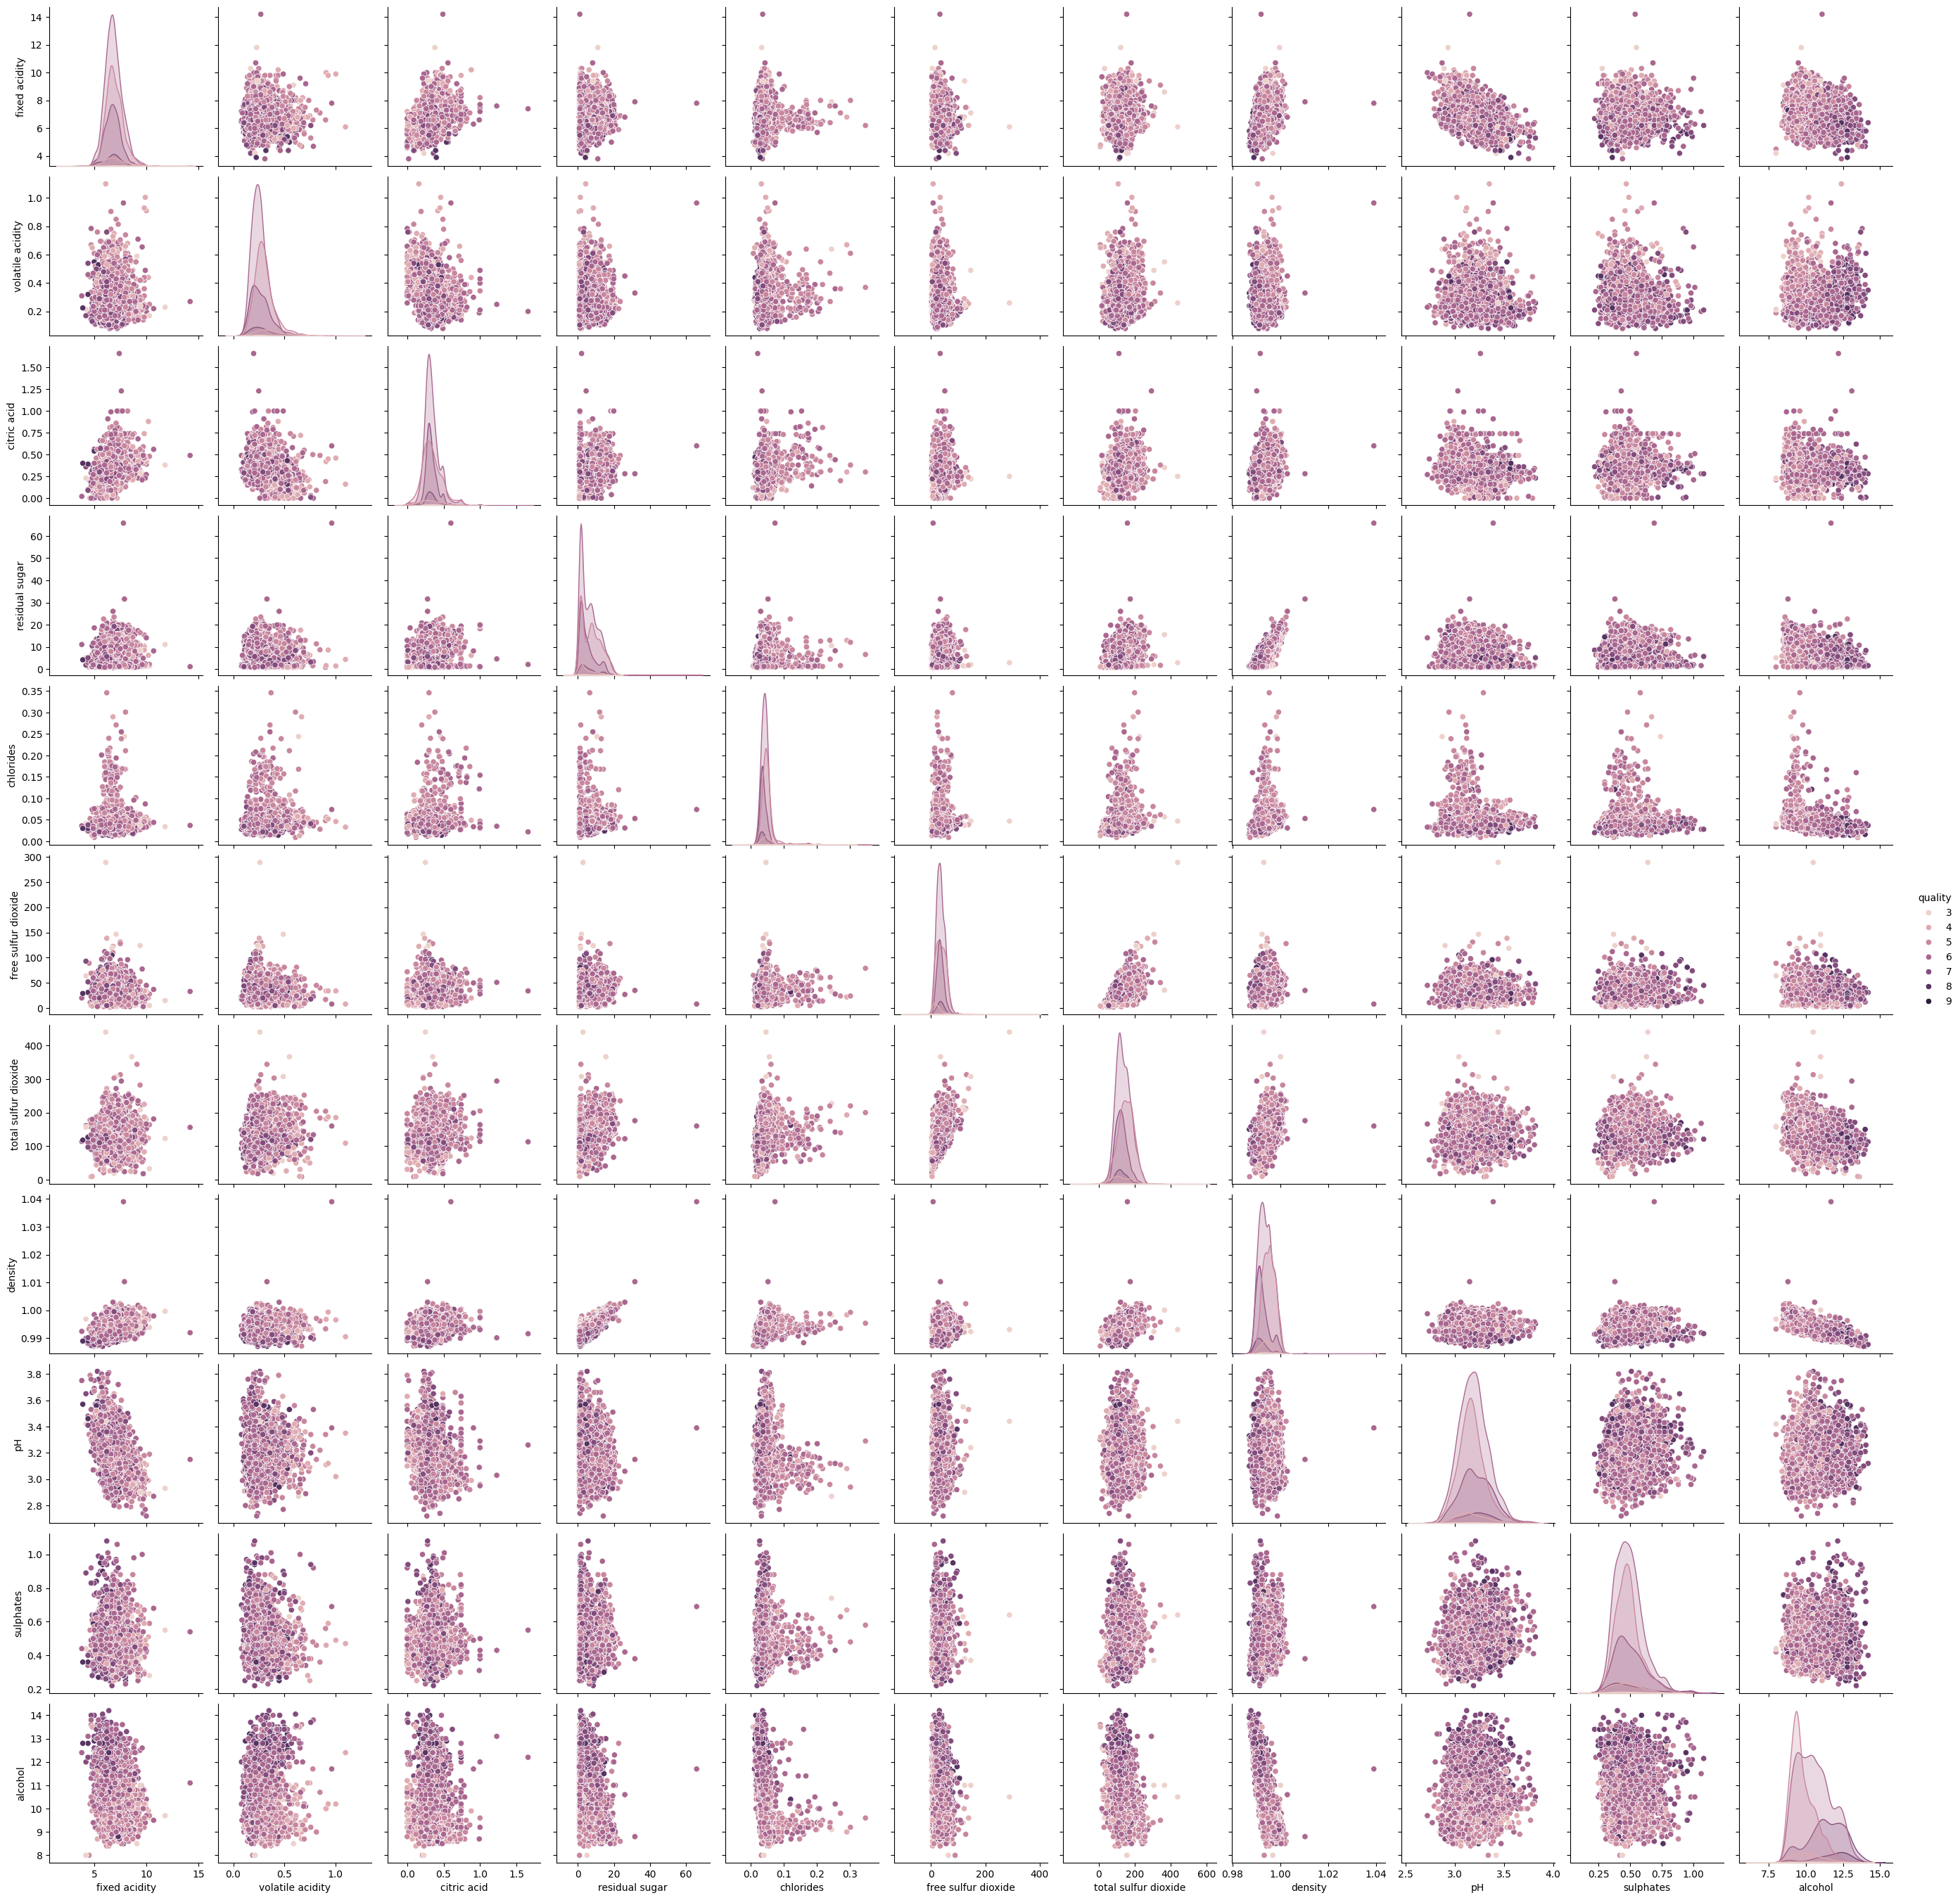

In [8]:
#Data Visualization
sns.pairplot(df, vars=df.columns[:-1], hue='quality', diag_kind='kde')
plt.show()

In [11]:
# Data preprocessing
# Handling missing values (if any)
print(df.isnull().sum())

# Splitting the data into features and target variable
X_white = df.drop('quality', axis=1)
y_white = df['quality']

#Scaling the numerical features
scaler = StandardScaler()
X_white_scaled = scaler.fit_transform(X_white)


# Splitting the data into training, validation and testing sets
X_white_train, X_white_val, y_white_train, y_white_val = train_test_split(X_white_scaled, y_white, test_size=0.2, random_state=42)




fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [12]:
# Train models with varying hyperparameters
# Random Forest
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3)
rf_grid.fit(X_white_train, y_white_train)
rf_best = rf_grid.best_estimator_

In [13]:
# Validate models on the validation set
rf_val_pred = rf_best.predict(X_white_val)
rf_val_mse = mean_squared_error(y_white_val, rf_val_pred)
print("Random Forest ValidationMSE:", rf_val_mse)


Random Forest ValidationMSE: 0.3471614058956916


In [16]:
# Test the selected model on white wine dataset
white_wine_predictions = rf_best.predict(X_white_scaled)
white_wine_mse = mean_squared_error(y_white, white_wine_predictions)
print("MSE on White Wine:", white_wine_mse)

MSE on White Wine: 0.11163013474887709


In [18]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(rf_best, pickle_out)
pickle_out.close()